In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import pandas_datareader as web
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
import talib
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score,balanced_accuracy_score,f1_score,average_precision_score,precision_score
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import GridSearchCV

In [80]:
start="1-1-2000"
end=dt.datetime.today()
ticker="DOW"
data=web.DataReader(ticker,"yahoo",start,end)
inv=10000
data['Pct Change']=data['Adj Close'].pct_change()*100
data['Movement']=None
m=0.55
for i in range(len(data['Pct Change'])):
    if data['Pct Change'].iloc[i]<-m:
        data['Movement'].iloc[i]=-1
    elif data['Pct Change'].iloc[i]>m:
        data['Movement'].iloc[i]=1
    else:
        data['Movement'].iloc[i]=0
data[['Movement']]

/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Movement
Date,
2019-03-20,0
2019-03-21,-1
2019-03-22,-1
2019-03-25,1
2019-03-26,-1
...,...
2020-06-30,0
2020-07-01,0
2020-07-02,1


In [81]:
#Feature Engineering
fdata=pd.DataFrame(index=data.index)
fdata['DReturn']=(data['Close']/data['Open']).apply(np.log)
fdata['Vol']=data['Volume'].apply(np.log)
fdata['High']=data['High'].apply(np.log)
fdata['Close']=data['Close'].apply(np.log)
fdata[f'Vol Diff 16']=data['Volume'].diff(16)
#fdata['Vol Diff 50'] = data['Volume'].diff(50)
#fdata['pctc'] = data[['Volume']].astype(int).apply(lambda x: x.pct_change()) 
#for i in range(50,51):
    #fdata[f'mavg{i}']=(data['Adj Close'].rolling(i).mean()).dropna()
#fdata['std']=data['Adj Close'].rolling(30).mean().dropna()
#fdata['mr']=data['Adj Close']/data['Adj Close'].shift(1)
period=np.arange(1,31)
#for i in range(1,10):
    #name = 'LaggedReturn_' + str(i)
    #fdata[name] = data['Close'].pct_change(periods=i)
#for i in range(1, len(period)):
    #fdata['SMA-%i'%period[i]] = talib.MA(data['Close'], timeperiod=period[i])
#for i in range(1, len(period)):
    #fdata['EMA-%i'%period[i]] = talib.EMA(data['Close'], timeperiod=period[i])
for i in range(1, len(period)):
    fdata['ROC-%i'%period[i]] = talib.ROC(data['Close'], period[i])  
for i in range(1, len(period)):
    fdata['MOM-%i'%period[i]] = talib.MOM(data['Close'], period[i])
for i in range(8, len(period), 6):
    fdata['ATR-%i'%i] = talib.ATR(data['High'], data['Low'], data['Close'], timeperiod=i)
for i in range(8, len(period), 6):
    fdata['RSI-%i'%i] = talib.RSI(data['Close'], i)
#for i in range(10, len(period)):
    #fdata['BBANDS-%i'%i] = talib.BBANDS(data['Close'], timeperiod=i, nbdevup=2, nbdevdn=2, matype=0)
#for i in range(1, len(period)):
    #fdata['VAR-%i'%i] = talib.VAR(data['Close'], i)
#for i in range(2, len(period)):
    #fdata['KAMA-%i'%i] = talib.KAMA(data['Close'], timeperiod=i)
#for i in range(2, len(period)):
    #fdata['TEMA-%i'%i] = talib.TEMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['TRIMA-%i'%i] = talib.TRIMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['ULTOSC-%i'%i] = talib.ULTOSC(data['High'],data['Low'],data['Close'], timeperiod1=i, timeperiod2=i*2, timeperiod3=i*3)
for i in range(2, len(period)):
    fdata['ROCR100-%i'%i] = talib.ROCR100(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['ROCR-%i'%i] = talib.ROCR(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['ADXR-%i'%i] = talib.ADXR(data['High'],data['Low'],data['Close'], timeperiod=i)
#for i in range(2, len(period)):
    #fdata['MINUS_DI-%i'%i] = talib.MINUS_DI(data['High'],data['Low'],data['Close'], timeperiod=i)
#for i in range(2, len(period)):
    #fdata['WILLR-%i'%i] = talib.WILLR(data['High'],data['Low'],data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['ROCP-%i'%i] = talib.ROCP(data['Close'], timeperiod=i)
#for i in range(2, len(period)):
    #fdata['CMO-%i'%i] = talib.CMO(data['Close'], timeperiod=i)
#for i in range(2, len(period)):
    #fdata['ADX-%i'%i] = talib.ADX(data['High'],data['Low'],data['Close'], timeperiod=i)

0.6732828889769861 ROC-2
0.6191443943034477 ROC-3
0.6640133825921437 MOM-2
0.5943527817052607 MOM-3
0.5027734279369581 MOM-4
0.6732828889769857 ROCR100-2
0.6191443943034478 ROCR100-3
0.673282888976986 ROCR-2
0.6191443943034478 ROCR-3
0.6732828889769864 ROCP-2
0.6191443943034481 ROCP-3


['ROC-2',
 'ROC-3',
 'MOM-2',
 'MOM-3',
 'MOM-4',
 'ROCR100-2',
 'ROCR100-3',
 'ROCR-2',
 'ROCR-3',
 'ROCP-2',
 'ROCP-3']

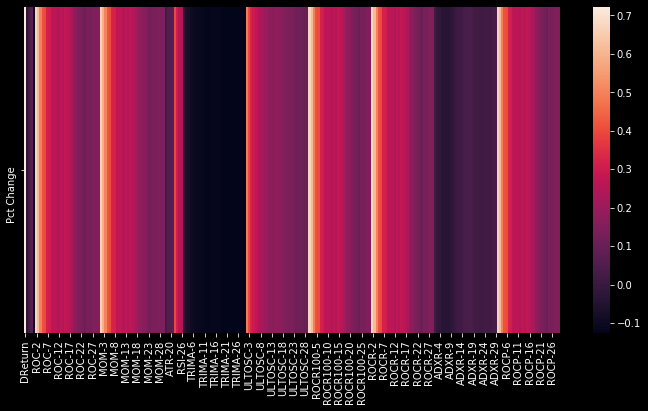

In [82]:
corco=pd.DataFrame(data=fdata).reset_index()
corco.insert(0,'Pct Change',data['Pct Change'].values)
plt.figure(figsize=(12,6))
corr=corco.corr().iloc[:1, 1:]
sns.heatmap(corr)
hf=[]
for col in corr.columns:
    if corr[col].loc['Pct Change']>0.5:
        if col!='Adj Close' and col!='Pct Change' and col!='DReturn'and col!='High' and col!='Close'and col!='Low':
            print(corr[col]['Pct Change'], col)
            hf.append(col)
#hf=hf[:]
hf

In [83]:
scaler=MinMaxScaler(feature_range=(0,1))
X=fdata[['ROC-2','ROC-3','ROCR-2','ROCR-3','ROCP-2','ROCP-3','MOM-2', 'ROCR100-2']].dropna()
#X=fdata[hf].dropna()
y=data['Movement'].shift(-1).dropna()
tpec=0.75
size=int(len(X)*tpec)
X_train, X_test, y_train, y_test = X[0:size], X[size:len(X)], y[0:size], y[size:len(y)]
y_train=y_train.astype('int')
y_test=y_test.astype('int')
y

Date
2019-03-20    -1
2019-03-21    -1
2019-03-22     1
2019-03-25    -1
2019-03-26     1
              ..
2020-06-29     0
2020-06-30     0
2020-07-01     1
2020-07-02     1
2020-07-06    -1
Name: Movement, Length: 327, dtype: object

In [106]:
#model=LinearRegression()
#model=RandomForestClassifier(n_estimators=500, max_leaf_nodes=50, max_depth=50, min_samples_split=50)
#model=knn(n_neighbors=5)
#model=mlp(solver='lbfgs',activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              #beta_2=0.999, early_stopping=False, epsilon=1e-08,
              #hidden_layer_sizes=(100,), learning_rate='constant',
              #learning_rate_init=0.001, max_fun=15000, max_iter=200,
              #momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              #power_t=0.5, random_state=100, shuffle=True,
              #tol=0.0001, validation_fraction=0.1, verbose=False,
              #warm_start=False)
# param_grid=[{'activation': ['identity', 'logistic', 'tanh','relu'],
                          #'max_iter': [100, 200, 300],
                          #'solver': ['lbfgs', 'sgd', 'adam']}],
             #pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             #scoring=None, verbose=0)
param_grid=[
        {
            'activation' : ['relu'],
            'solver' : ['lbfgs'],
            'max_iter':np.arange(50,150,5)
        }
       ]
#for i in np.arange(1,21,1):
model=GridSearchCV(mlp(random_state=12), param_grid)
model.fit(X_train,y_train)
pred=model.predict(X_test)
    #print( "run",i,accuracy_score(y_test[:len(pred)], pred))

/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarni

In [ ]:
param_grid=[
        {
            'n_estimators': np.arange(1,100,10),
            'max_features': ['auto', 'sqrt'],
            'max_depth': np.arange(1,100,10),
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
       ]
model=GridSearchCV(RandomForestClassifier(random_state=12), param_grid)
model.fit(X_train,y_train)
pred=model.predict(X_test)

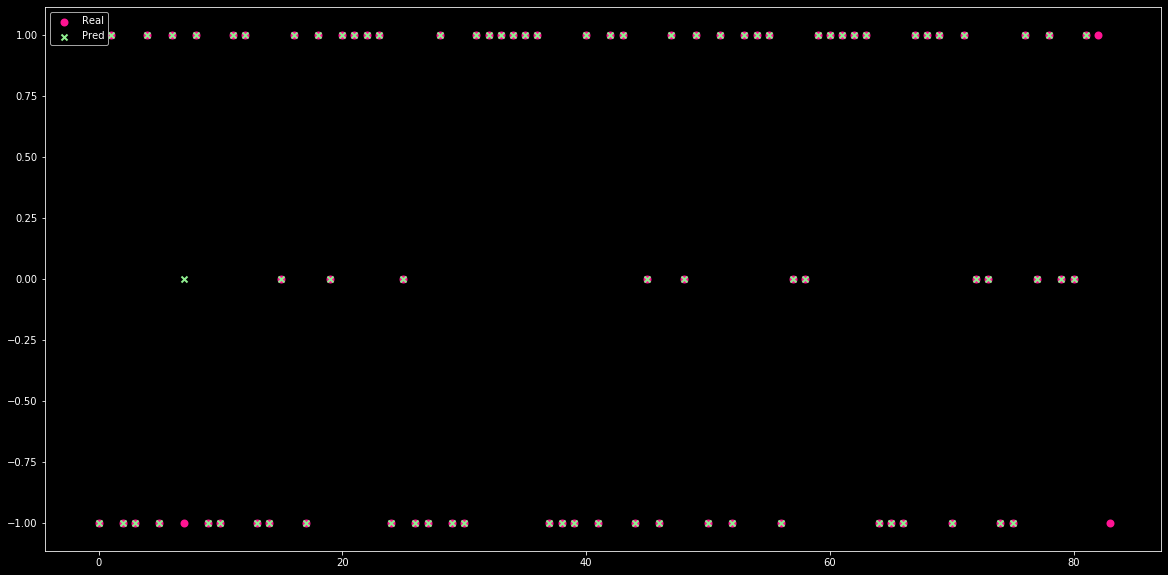

0.9878048780487805


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...uffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'act

In [107]:
#print("Percentage Error: ", round((mae(pred, y_test[:213])/data['Adj Close'][-1])*100, 3),"%")
#for i in range(0,len(pred.columns)):
    #plt.plot(np.array(pred.iloc[:,i].shift(27)),label=pred.iloc[:,i].name, linewidth=2)
plt.figure(figsize=(20,10))
plt.scatter(y=np.array(y_test),x=np.arange(len(y_test)), marker="o",label="Real", color="deeppink",linewidth=2)
plt.scatter(y=pred,x=np.arange(len(pred)),color="lightgreen", linewidth=2,label="Pred", marker="x")
plt.legend()
plt.show()
print(accuracy_score(y_test[:len(pred)], pred))
model

In [92]:
pred=pd.DataFrame(data=pred,index=X_test.index)
print("Tomorrow's Prediction", pred[-1:].values)
pred

Tomorrow's Prediction [[1]]


,0
Date,
2020-03-11,-1
2020-03-12,1
2020-03-13,-1
2020-03-16,-1
2020-03-17,1
...,...
2020-06-30,0
2020-07-01,1
2020-07-02,0


In [302]:
spypred65=pd.DataFrame(data=pred,index=X_test.index)
spypred65

,0
Date,
2015-02-20,0
2015-02-23,0
2015-02-24,0
2015-02-25,0
2015-02-26,0
...,...
2020-06-29,1
2020-06-30,-1
2020-07-01,1


In [291]:
X_test.index

DatetimeIndex(['2015-02-20', '2015-02-23', '2015-02-24', '2015-02-25',
               '2015-02-26', '2015-02-27', '2015-03-02', '2015-03-03',
               '2015-03-04', '2015-03-05',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-29', '2020-06-30', '2020-07-01',
               '2020-07-02', '2020-07-06'],
              dtype='datetime64[ns]', name='Date', length=1353, freq=None)

In [148]:
#Prediction SPY: tmrw, pct change >0.67 mayb
spypred

,0
Date,
2015-02-20,0
2015-02-23,0
2015-02-24,0
2015-02-25,0
2015-02-26,0
...,...
2020-06-29,1
2020-06-30,-1
2020-07-01,1


In [321]:
senspred=pd.DataFrame(data=pred,index=X_test.index)
senspred

,0
Date,
2015-02-12,0
2015-02-13,0
2015-02-16,1
2015-02-18,1
2015-02-19,0
...,...
2020-07-01,0
2020-07-02,0
2020-07-03,1


In [106]:
p=pd.DataFrame(pred, index=y_test.index[:len(pred)])
y_test=pd.DataFrame(y_test)

p.iloc[:-5], y_test.iloc[:5]

(            0
 Date         
 2015-02-17  0
 2015-02-18  0
 2015-02-19  0
 2015-02-20  0
 2015-02-23  0
 ...        ..
 2020-06-17  0
 2020-06-18 -1
 2020-06-19  1
 2020-06-22  0
 2020-06-23 -1
 
 [1348 rows x 1 columns],
             Movement
 Date                
 2015-02-17         0
 2015-02-18         0
 2015-02-19         0
 2015-02-20         0
 2015-02-23         0)

In [1152]:
corr=corco.corr()
corr

,Pct Change,Adj Close,DReturn,Vol,High,Close,Vol Diff 16,ROC-2,ROC-3,ROC-4,...,CCI-20,CCI-21,CCI-22,CCI-23,CCI-24,CCI-25,CCI-26,CCI-27,CCI-28,CCI-29
Pct Change,1.000000,0.026711,0.536301,NaN,0.030274,0.042817,NaN,0.648414,0.539199,0.486305,...,0.334652,0.330962,0.326871,0.322756,0.315432,0.311824,0.308961,0.306344,0.302255,0.299641
Adj Close,0.026711,1.000000,0.018642,NaN,0.995235,0.995295,NaN,0.039681,0.050862,0.060265,...,0.140509,0.141593,0.142049,0.142717,0.143528,0.144562,0.145497,0.146708,0.148386,0.150290
DReturn,0.536301,0.018642,1.000000,NaN,-0.003153,0.018167,NaN,0.417717,0.329980,0.299885,...,0.170256,0.168048,0.165204,0.162160,0.159065,0.156638,0.154498,0.152605,0.150047,0.148351
Vol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High,0.030274,0.995235,-0.003153,NaN,1.000000,0.999238,NaN,0.044260,0.054605,0.063047,...,0.136839,0.138067,0.138677,0.139471,0.140115,0.141182,0.142160,0.143413,0.144962,0.146835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCI-25,0.311824,0.144562,0.156638,NaN,0.141182,0.144015,NaN,0.456444,0.557092,0.623570,...,0.976181,0.984305,0.990847,0.995701,0.998865,1.000000,0.998908,0.996220,0.992391,0.987708
CCI-26,0.308961,0.145497,0.154498,NaN,0.142160,0.145009,NaN,0.451086,0.550676,0.617159,...,0.969090,0.977971,0.985441,0.991455,0.995995,0.998908,1.000000,0.998992,0.996456,0.992783
CCI-27,0.306344,0.146708,0.152605,NaN,0.143413,0.146275,NaN,0.446179,0.544673,0.610904,...,0.961759,0.971243,0.979461,0.986362,0.991959,0.996220,0.998992,1.000000,0.999052,0.996615
CCI-28,0.302255,0.148386,0.150047,NaN,0.144962,0.147828,NaN,0.440150,0.537834,0.604058,...,0.954246,0.964221,0.973046,0.980666,0.987086,0.992391,0.996456,0.999052,1.000000,0.999052


In [585]:
scores={}

for i in np.arange(0.01,1,0.01):
    corco=pd.DataFrame(data=fdata).reset_index()
    corco.insert(1,'Adj Close',data['Adj Close'].shift(-1).values)
    corco.insert(0,'Pct Change',data['Pct Change'].values)
    corr=corco.corr().iloc[:1]
    hf=[]
    for col in corr.columns:
        if corr[col]['Pct Change']>0.57:
            if col!='Pct Change' and col!='DReturn':
                hf.append(col)
    scaler=MinMaxScaler(feature_range=(0,1))
    #X=fdata[['ROC-2','ROC-3','ROCR-2','ROCR-3','ROCP-2','ROCP-3','MOM-2', 'ROCR100-2','CCI-2']].dropna()
    X=fdata[hf].dropna()
    y=data['Movement'].iloc[:len(X)+1].shift(-1).dropna()

    tpec=0.75
    size=int(len(X)*tpec)
    X_train, X_test, y_train, y_test = X[0:size], X[size:len(X)], y[0:size], y[size:len(y)]
    y_train=y_train.astype('int')
    y_test=y_test.astype('int')
    #model=LinearRegression()
    model=RandomForestClassifier(n_estimators=500)
    #model=knn(n_neighbors=5)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    sc=accuracy_score(y_test[:len(y_test)], pred)
    scores.update({f"P{i}":sc})

KeyboardInterrupt: 

In [9]:
scrs={}

for i in np.arange(0,21,1):
    print("Run",i)
    model=mlp(random_state=i)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    sc=accuracy_score(y_test[:len(pred)], pred)
    scrs.update({f"P{i}":sc})

Run 0
Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19
Run 20


In [1339]:
highest=0
for i in scores.values():
    if i>highest:
        highest=i
    
for key, value in scores.items(): 
         if highest==value: 
            print(key, value)

Percentage: 0.75 0.9690098261526833


([<matplotlib.axis.XTick at 0x1a588efdd0>,
 <a list of 84 Text xticklabel objects>)

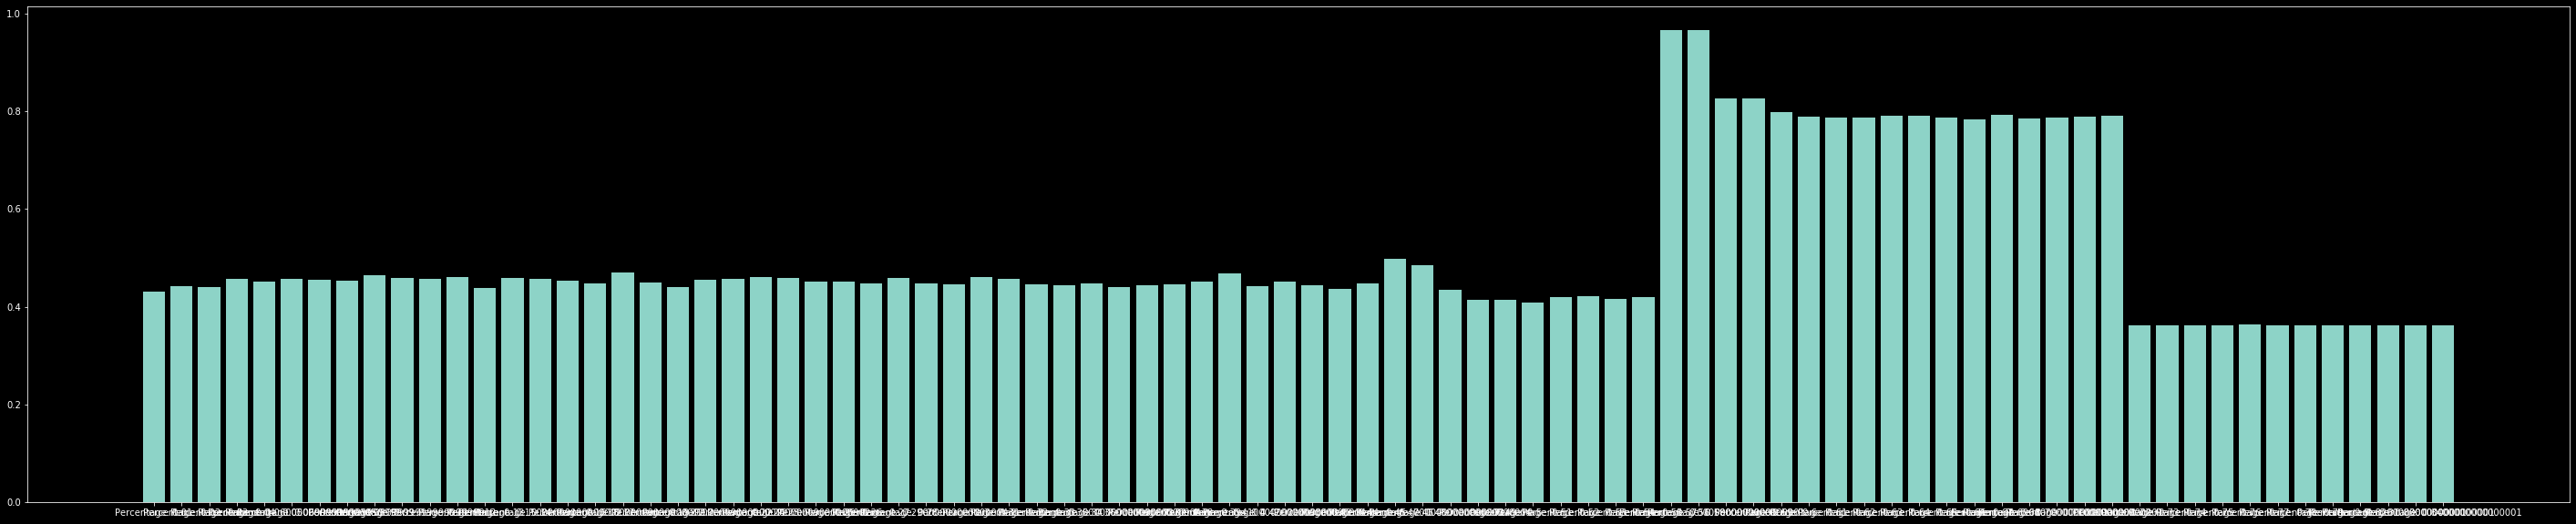

In [1327]:
plt.figure(figsize=(50,10))
plt.bar(range(1,len(scores)+1),list(scores.values()))
plt.xticks(range(1,len(scores)+1),list(scores.keys()))

In [1313]:
scr=[]
for i in scores.values():
    print(i)
    scr.append(pd.Series(i))

0.4592933947772657
0.4362108479755539
0.45261561789234267
0.4682299546142209
0.4167927382753404
0.8027210884353742
0.7928949357520786
0.36205593348450493


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [1504]:
sco=sorted(sco.items)
sco

AttributeError: 'list' object has no attribute 'items'

In [430]:
#model=DecisionTreeRegressor(criterion='mse') 
#model=LinearRegression()
#model=RandomForestRegressor()
#model=XGBRegressor(n_estimators=500, learning_rate=0.1)
model=Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5,batch_size=10)
pred=pd.DataFrame()
sco={}
for i in range(20,30+1):
    for k in range(20,30+1):
        for l in range(20,30+1):
            model=RandomForestClassifier(n_estimators=100,max_leaf_nodes=i, max_depth=k, min_samples_split=l,n_jobs=-1)
            model.fit(X_train,y_train)
            pred[f'p{i}-{k}-{l}']=model.predict(X_test)
            sco.update({f'p{i}-{k}-{l}':accuracy_score(pred[f'p{i}-{k}-{l}'], y_test.iloc[:len(pred[f'p{i}-{k}-{l}'])])})

Epoch 1/5


ValueError: in user code:

    /Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:533 train_step  **
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:205 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:143 __call__
        losses = self.call(y_true, y_pred)
    /Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:246 call
        return self.fn(y_true, y_pred, **self._fn_kwargs)
    /Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1595 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    /Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4692 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:172 sigmoid_cross_entropy_with_logits
        (logits.get_shape(), labels.get_shape()))

    ValueError: logits and labels must have the same shape ((None, 10) vs (None, 1))
